$\huge{\textbf{Dinamika HF1 megoldó}} - \huge{near731}$

<img src="dinhf1abra.jpg" />



In [1]:
#Imports

import numpy as np
import sympy as sp
import math
import matplotlib
import matplotlib.pyplot as plt
import sympy as sp
import math
from sympy import init_printing
import scipy.linalg as la
from sympy import *
from sympy import Matrix, symbols, solve_linear_system
from sympy.plotting import plot
from sympy.interactive import printing
from sympy.printing.latex import LatexPrinter, print_latex
printing.init_printing(use_latex=True)


$\Large{\textbf{Adatok:}}$

In [2]:
#Symbols

phi_1,phi_3,l_1,l_2,l_3,omega,omega2_z,omega3_z,epszilon_2z,epszilon_3z=sp.symbols("phi_1,phi_3,l_1,l_2,l_3,omega,omega2_z,omega3_z,epszilon_2z,epszilon_3z")

#Adatok

phi_1_adat=float(input("phi_1="))*np.pi/180 #fok
phi_3_adat=60*np.pi/180 #fok
l_1_adat=float(input("l_1=")) #m
l_2_adat=float(input("l_2=")) #m
l_3_adat=float(input("l_3=")) #m
omega_z=float(input("omega_z")) #1/s
omega_adat=sp.Matrix([0,0,omega_z]) #rad/s

data=[(phi_1,phi_1_adat),(phi_3,phi_3_adat),(l_1,l_1_adat),(l_2,l_2_adat),(l_3,l_3_adat),(omega,omega_adat)]

$\Large{\textbf{2.Feladatrész}}$

$\large{\textbf{(2)-es test szögsebessége és S2 súlypont sebessége:}}$

2.feladatrész

Helyvektorok:

r_AB=


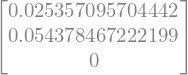

r_BC=


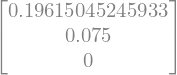

r_CD=


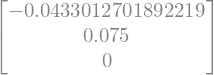

r_BS2=


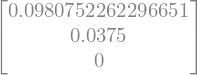

Sebességek:

v_B(m/s): 


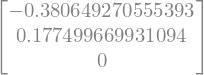


v_C(m/s):


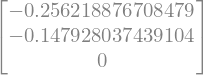

Szögsebességek:

omega_2(1/s):


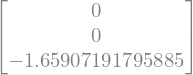


omega_3(1/s):


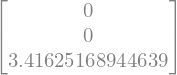


v_S2(m/s):


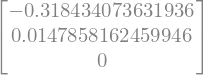

|v_S2|= 0.318777162939709 m/s


In [3]:
#2.feladatrész

print("2.feladatrész")

v_A=sp.Matrix([0,0,0])
v_D=sp.Matrix([0,0,0])

#Vectors

r_AB=sp.Matrix([(l_1_adat*np.cos(phi_1_adat)),(l_1_adat*np.sin(phi_1_adat)),0])

r_BC=sp.Matrix([(np.sqrt((l_2_adat)**2-(l_3_adat+l_3_adat*np.cos(phi_3_adat))**2)),
l_3_adat+l_3_adat*np.cos(phi_3_adat),0])

r_CD=sp.Matrix([-(l_3_adat*np.sin(phi_3_adat)),l_3_adat+l_3_adat*np.cos(phi_3_adat),0])

r_BS2=sp.Matrix([(np.sqrt((l_2_adat)**2-(l_3_adat+l_3_adat*np.cos(phi_3_adat))**2))/2,
((l_3_adat+l_3_adat*np.cos(phi_3_adat))/2),0])

print("\nHelyvektorok:")

print("\nr_AB=")
display(r_AB)
print("r_BC=")
display(r_BC)
print("r_CD=")
display(r_CD)
print("r_BS2=")
display(r_BS2)

#Velocity

print("Sebességek:")

omega_2=sp.Matrix([0,0,omega2_z])
omega_3=sp.Matrix([0,0,omega3_z])

v_B=sp.Matrix(v_A+omega_adat.cross(r_AB))
print("\nv_B(m/s): ")
display(v_B)

v_C1=sp.Matrix(v_B+omega_2.cross(r_BC))
v_C2=sp.Matrix(v_D+omega_3.cross(r_CD))

#print("\nv_C1=",v_C1,"m/s")
#print("\nv_C2=",v_C2,"m/s")

#Equations

ans=solve(v_C1-v_C2, [omega2_z,omega3_z])

#display(ans)

omega2_z=omega2_z.subs(ans)
omega3_z=omega3_z.subs(ans)

omega_2=omega_2.subs(ans)
omega_3=omega_3.subs(ans)

v_C=v_C1.subs(ans)

print("\nv_C(m/s):")
display(v_C)

print("Szögsebességek:")

print("\nomega_2(1/s):")
display(omega_2)

print("\nomega_3(1/s):")
display(omega_3)


v_S2=sp.Matrix(v_B+omega_2.cross(r_BS2))

print("\nv_S2(m/s):")
display(v_S2)

v_S2_abs=sp.sqrt(v_S2.dot(v_S2))
print("|v_S2|=",v_S2_abs,"m/s")

$\Large{\textbf{3.Feladatrész:}}$

$\large{\textbf{Sebességpólus helye:}}$

Sebesség pólus meghatározása:
r_AP:


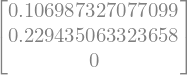

In [4]:
print("Sebesség pólus meghatározása:")

r_AP = (1/(omega_2.dot(omega_2.transpose())))*omega_2.cross(v_B)
print("r_AP:")
display(r_AP)


$\Large{\textbf{4.Feladatrész:}}$

$\large{\textbf{(2)-es test szöggyorsulása és S2 súlypont gyorsulása:}}$


Szöggyorsulások:

epszilon_2


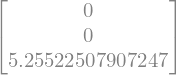

epszilon_3


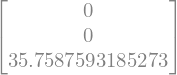


a_S2(m/s2):


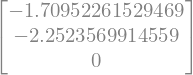

|a_S2|: 2.82764559115251 m/s2


In [5]:
#Accelaration

a_A=sp.Matrix([0,0,0])
epszilon_1=sp.Matrix([0,0,0])

a_B = -omega_adat.dot(omega_adat) * r_AB

#Csak radiális

a_D=sp.Matrix([0,omega_3.dot(omega_3)*l_3_adat,0])

#Equations system

epszilon_2=sp.Matrix([0,0,epszilon_2z])
epszilon_3=sp.Matrix([0,0,epszilon_3z])

a_C1=a_B+epszilon_2.cross(r_BC)-omega_2.dot(omega_2)*r_BC
a_C2=a_D+epszilon_3.cross(r_CD)-omega_3.dot(omega_3)*r_CD

ans=solve(a_C1-a_C2,[epszilon_2z,epszilon_3z])
#display(ans)

print("\nSzöggyorsulások:")

epszilon_2=epszilon_2.subs(ans)
epszilon_3=epszilon_3.subs(ans)

epszilon_2z=epszilon_2z.subs(ans)
epszilon_3z=epszilon_3z.subs(ans)


print("\nepszilon_2")
display(epszilon_2)

print("epszilon_3")
display(epszilon_3)

a_S2=a_B+epszilon_2.cross(r_BS2)-omega_2.dot(omega_2)*r_BS2

print("\na_S2(m/s2):")
display(a_S2)

a_S2_abs=sp.sqrt(a_S2.dot(a_S2))
print("|a_S2|:",a_S2_abs,"m/s2")





$\Large{\textbf{5.Feladatrész:}}$

$\large{\textbf{B,C,D pontok gyorsulása:}}$

Gyorsulások:

a_B(m/s2):


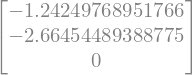

a_D(m/s2):


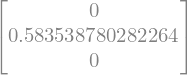

a_C(m/s2):


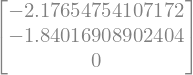

In [6]:
print("Gyorsulások:")

print("\na_B(m/s2):")
display(a_B)

print("a_D(m/s2):")
display(a_D)

a_C=a_C1.subs(ans)

print("a_C(m/s2):")
display(a_C)

$\Large{\textbf{6.Feladatrész:}}$

$\large{\textbf{Gyorsulásszög és gyorsuláspólus helye:}}$


alpha= 62.3558838747859 fok

r_SG:


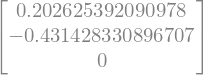

In [7]:
alpha=(sp.atan(epszilon_2z/(omega2_z**2)))*(180/np.pi)
alpha=alpha.subs(ans)

print("\nalpha=",alpha,"fok")

#r_SG

r_SG=sp.Matrix(((epszilon_2.cross(a_S2))+(omega2_z**2)*a_S2)/(epszilon_2z**2+omega2_z**4))
print("\nr_SG:")
display(r_SG)

$\Large{\textbf{7.Feladatrész:}}$

$\large{\textbf{S2 súlypont gyorsulásvektorának tangenciális és normális irányú komponensei:}}$

Tangenciális:

e_S2t:


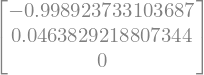

a_S2t(m/s2):


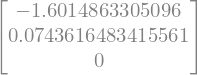


|a_S2t|= 1.60321181431312 m/s2

Normális:

a_S2n(m/s):


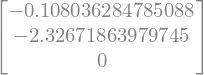


|a_S2n|= 2.32922550810587 m/s2


In [8]:
e_S2t=sp.Matrix(v_S2/v_S2_abs)

print("Tangenciális:")

print("\ne_S2t:")
display(e_S2t)

a_S2t=a_S2.dot(e_S2t)*e_S2t
print("a_S2t(m/s2):")
display(a_S2t)

a_S2t_abs=sp.sqrt(a_S2t.dot(a_S2t))
print("\n|a_S2t|=",a_S2t_abs,"m/s2")


print("\nNormális:")

a_S2n=sp.Matrix(a_S2-a_S2t)
print("\na_S2n(m/s):")
display(a_S2n)

a_S2n_abs=sp.sqrt(a_S2n.dot(a_S2n))
print("\n|a_S2n|=",a_S2n_abs,"m/s2")



$\Large{\textbf{8.Feladatrész:}}$

$\large{\textbf{S2 súlypont pályájának pillanatnyi görbületi sugara:}}$

In [9]:
print("Görbületi sugár:")

rho_S2=(v_S2_abs**2)/(a_S2n_abs)
print("\nrho_S2:",rho_S2,"m")



Görbületi sugár:

rho_S2: 0.0436277549160648 m


# Saját felelősségre!

# *Ellenőrző:*

<img src="megoldasok.png"/>


$\huge{\textbf{Készítette: Németh Áron Imre}}$